## Import all useful libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

%matplotlib inline
# for interactive plots
# %matplotlib notebook
plt.style.use('ggplot')

## 1. Read from data file 

In [2]:
data_path = os.path.join('../data','NY_FL_flight_demand.csv')
df = pd.read_csv(data_path)

## 2. Data Summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694917 entries, 0 to 694916
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   search_date          694917 non-null  object
 1   origin_airport_code  694917 non-null  object
 2   origin_city          694917 non-null  object
 3   origin_region        694917 non-null  object
 4   origin_country       694917 non-null  object
 5   dest_airport_code    694917 non-null  object
 6   destination_city     694917 non-null  object
 7   destination_region   694917 non-null  object
 8   destination_country  694917 non-null  object
 9   flight_demand        694917 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 53.0+ MB


In [4]:
"""
Pandas has parsed 'search_date' column as string not datetime, lets remedy that
"""
print("Default dtype: ",type(df['search_date'][0]))
print("Modified dtype: ",type(pd.to_datetime(df['search_date'][0])))



Default dtype:  <class 'str'>
Modified dtype:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
"""
Converting to datetime will be useful for further operations
# """
df['search_date'] = pd.to_datetime(df['search_date'])
print("Start Date: {0} \nEnd Date: {1}".format(df['search_date'].min(),df['search_date'].max()))

"""
Setting 'search_date' as index will yield great operational benefits
"""
df.set_index('search_date', drop=True, inplace=True)

Start Date: 2016-03-01 00:00:00 
End Date: 2018-03-31 00:00:00


In [6]:
"""
Lets analyze the entropy of each column 
Observations: 
1. All flights are domestic
2. Some cities (likely large) have more than one airport
"""
print("Flights originating from {}".format(pd.unique(df['origin_region'])))
print("Flights destined for {}".format(pd.unique(df['destination_region'])))

Flights originating from ['FL' 'NY']
Flights destined for ['CO' 'MA' 'NY' 'DC' 'NC' 'MI' 'MD' 'AZ' 'WA' 'CA' 'TX' 'IL' 'MN' 'PA'
 'NV' 'NJ' 'OH' 'GA' 'LA' 'TN' 'FL' 'HI']


## 3. Ascertaining patterns i.e. Temporal | Spatial

In [7]:
"""
Quick operation to create some dated categorical variables
"""
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Year'] = df.index.year
df.reset_index(inplace=True,drop=True)

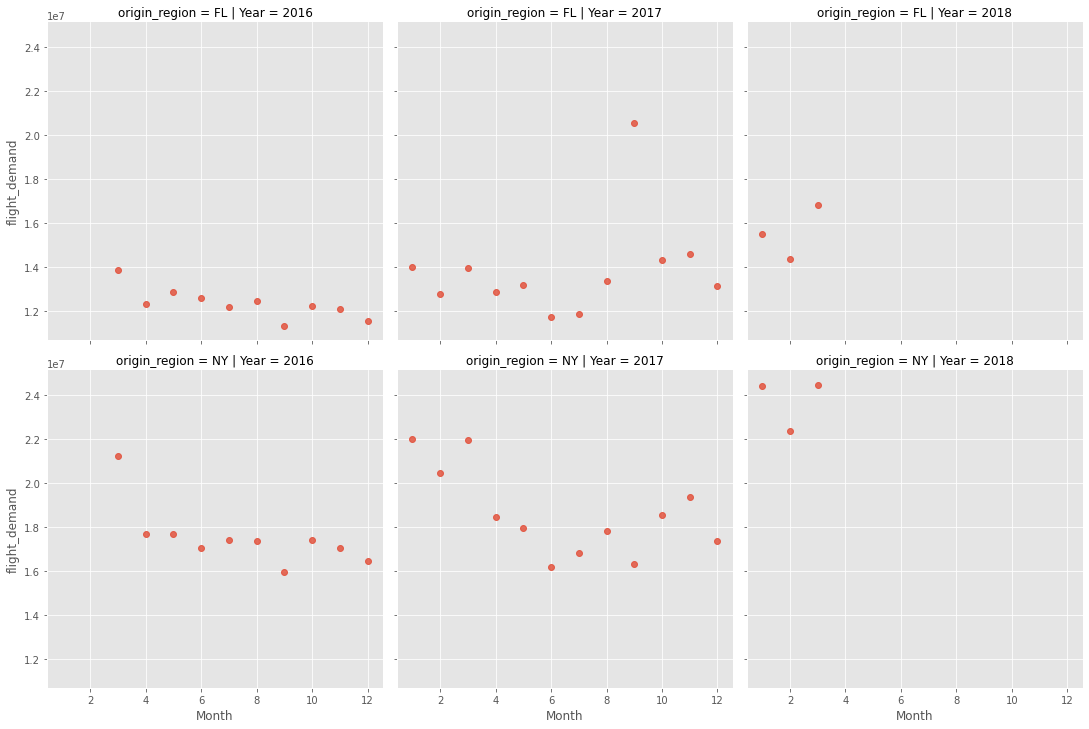

In [8]:
sns.lmplot(data=df.groupby(['origin_region','Year','Month']).sum().reset_index(),
           col='Year',row='origin_region',x='Month',y='flight_demand', fit_reg=False)
plt.show()

### Finding popular destinations 

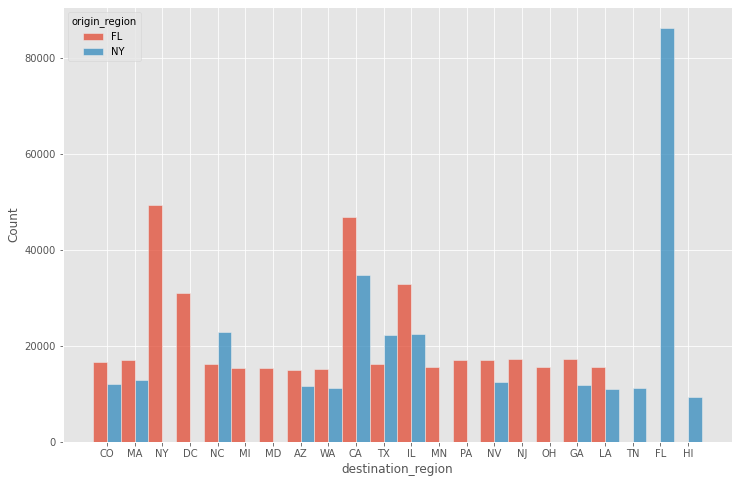

In [9]:
plt.figure(figsize=(12,8))
sns.histplot(data = df,
             hue = 'origin_region', x = 'destination_region',
             multiple='dodge')
plt.show()

New York to Florida seems to be the most popular

###  Looking at destinations across the years

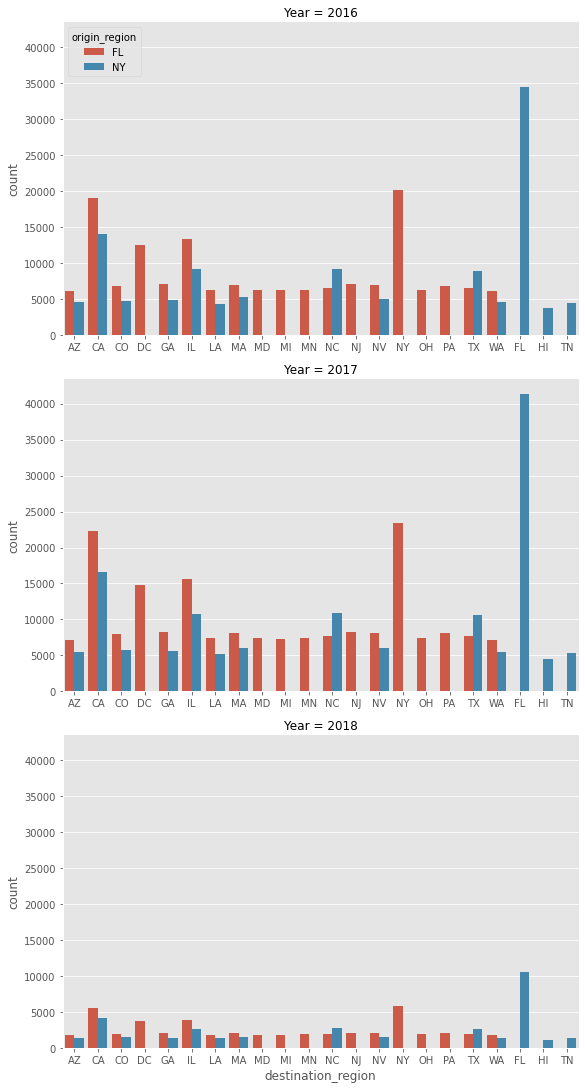

In [10]:
df['count'] = 1
temp  = df.groupby(['origin_region','Year','destination_region'])['count'].count().reset_index()


sns.catplot(x='destination_region',y='count',hue='origin_region',
           row='Year', data=temp, kind='bar', aspect=1.6,
           sharex=False, legend_out=False)
plt.show()

## 4. Reloading data and transforming 

The prior analysis has not revealed much, we will take a different approach. Firstly, we will read the data again

In [11]:
df = pd.read_csv(data_path)

In [12]:
"""
Reshaping the dataframe, s.t. demand for each (origin, destination) is computed.\
Furthermore, since the demand is at the airport level. For brevity will be summed up at the state level. 
"""
df_pivot = df.pivot_table(values='flight_demand',index=['search_date'],
               columns=['origin_region','destination_region'], aggfunc='sum' )



In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
ARIMA()